# Import Libraries

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from google.colab import drive


# Create a path to the dataset

In [0]:
drive.mount('/content/gdrive')
path = Path('gdrive/My Drive/Colab Notebooks/DATASET')
path.ls()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


[PosixPath('gdrive/My Drive/Colab Notebooks/DATASET/TEST'),
 PosixPath('gdrive/My Drive/Colab Notebooks/DATASET/TRAIN'),
 PosixPath('gdrive/My Drive/Colab Notebooks/DATASET/.DS_Store')]

# Load the data in using the ImageDataBunch

Classes: 
 ['O', 'R']


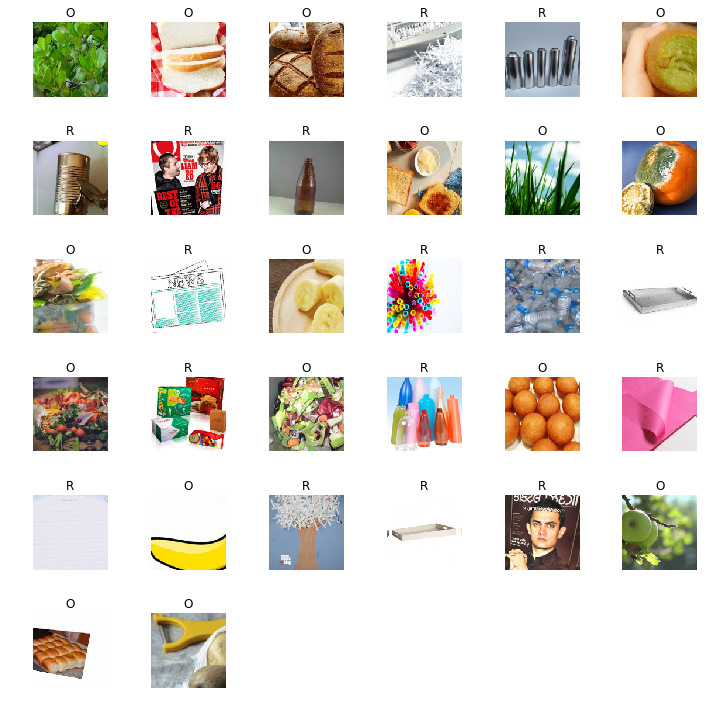

In [0]:
data = ImageDataBunch.from_folder(
    path,
    train = "TRAIN",
    valid = "TEST",
    ds_tfms=get_transforms(do_flip=False),
    size = 128,
    bs=32,
    valid_pct=0.2,
    num_workers=0
).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')
data.show_batch(rows=10,figsize=(10,10))

# Create the learner

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 55.0MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


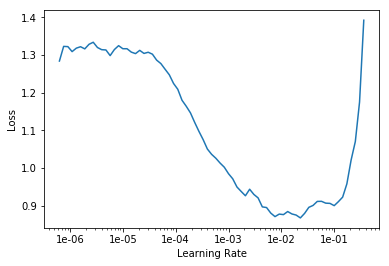

In [0]:
learn = create_cnn(data, models.resnet50,metrics=accuracy,model_dir='/tmp/model/')
learn.lr_find()
learn.recorder.plot()

# Train the model

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.227826,0.194139,0.927447,2:45:24
1,0.231434,0.150340,0.942396,05:20
2,0.152821,0.123061,0.952960,05:19
3,0.132424,0.112352,0.957345,05:19
4,0.128134,0.107917,0.961929,05:21


# Plot the losses of the training and validation

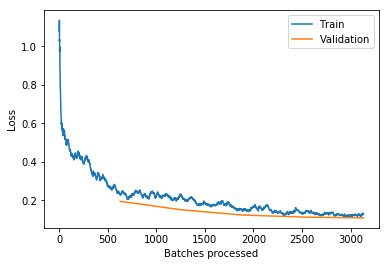

In [0]:
learn.recorder.plot_losses()

# Plot the top losses of your model

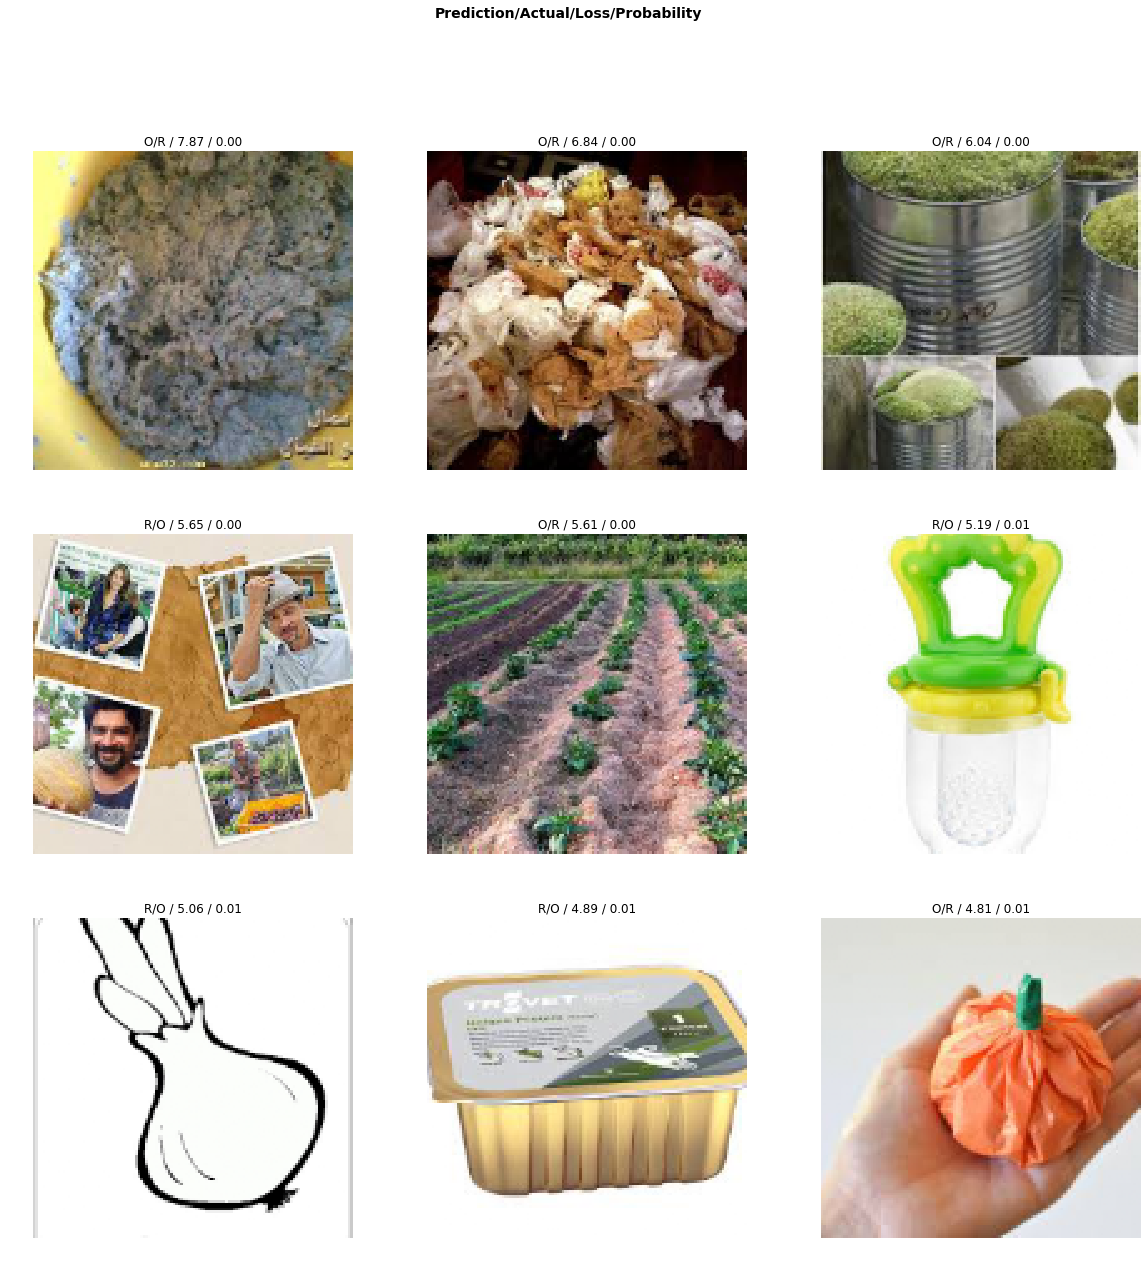

In [0]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_top_losses(9,figsize=(20,20))

# Plot a confusion matrix

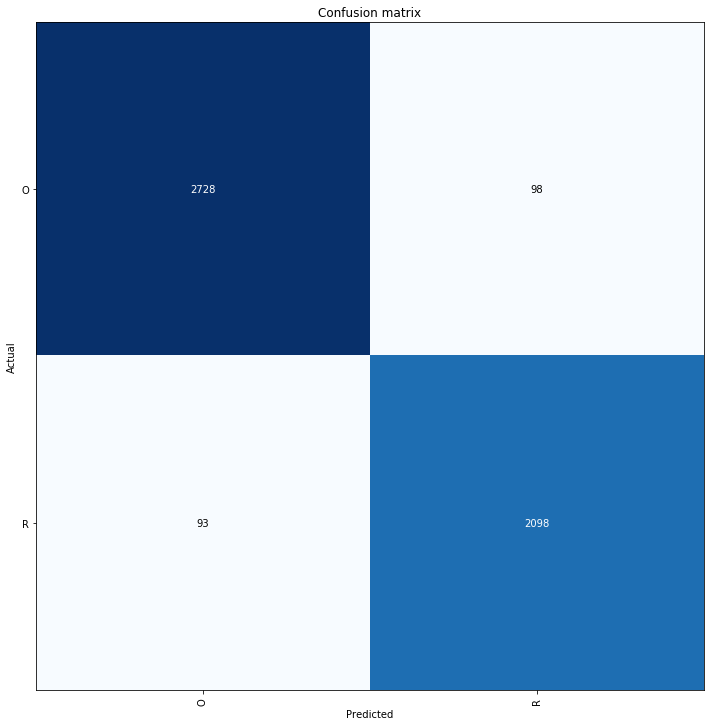

In [0]:
inter.plot_confusion_matrix(figsize=(10,10))

# Unfreeze model and train

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.248075,0.360802,0.852103,06:09
1,0.152861,0.130693,0.949970,06:08


# Find and plot the learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


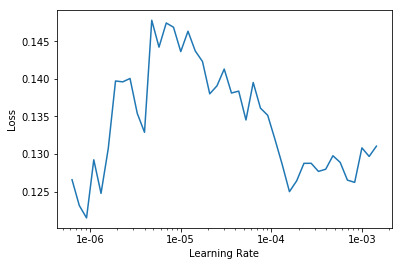

In [0]:
learn.lr_find()
learn.recorder.plot()

# Train the model

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.139173,0.125631,0.953159,06:05
1,0.124071,0.120058,0.956946,06:06
2,0.114413,0.120920,0.954554,06:04
3,0.104340,0.118099,0.957943,06:06
4,0.102202,0.118783,0.958142,06:04


# Plot the top losses of the model

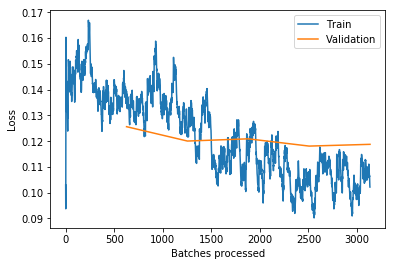

In [0]:
learn.recorder.plot_losses()

# Plot the top losses

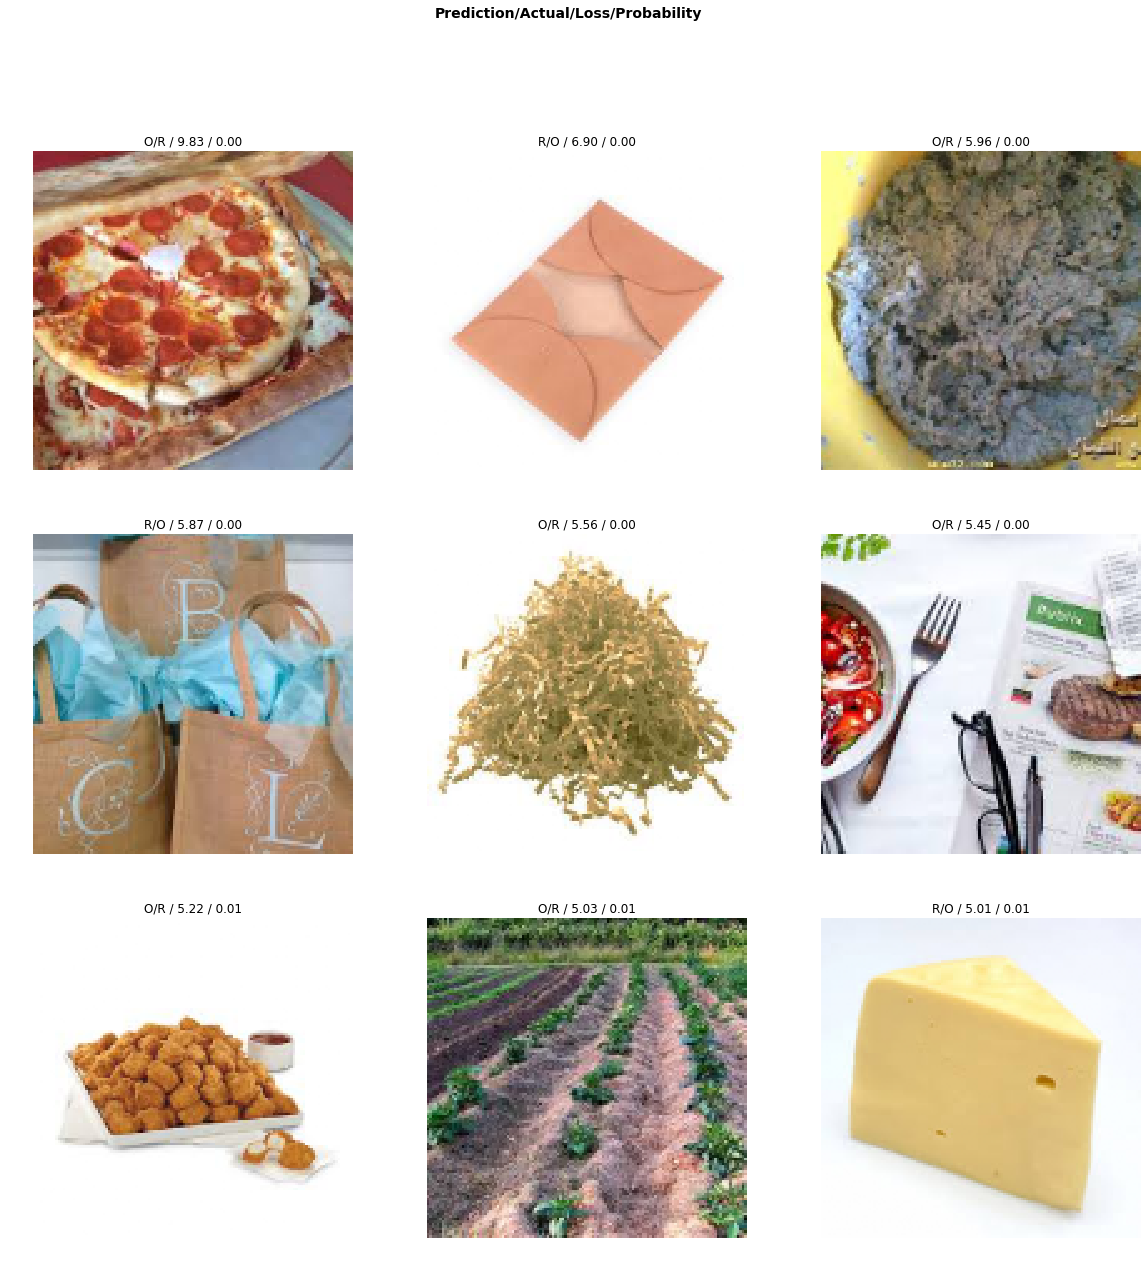

In [0]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_top_losses(9,figsize=(20,20))

# Plot confusion matrix

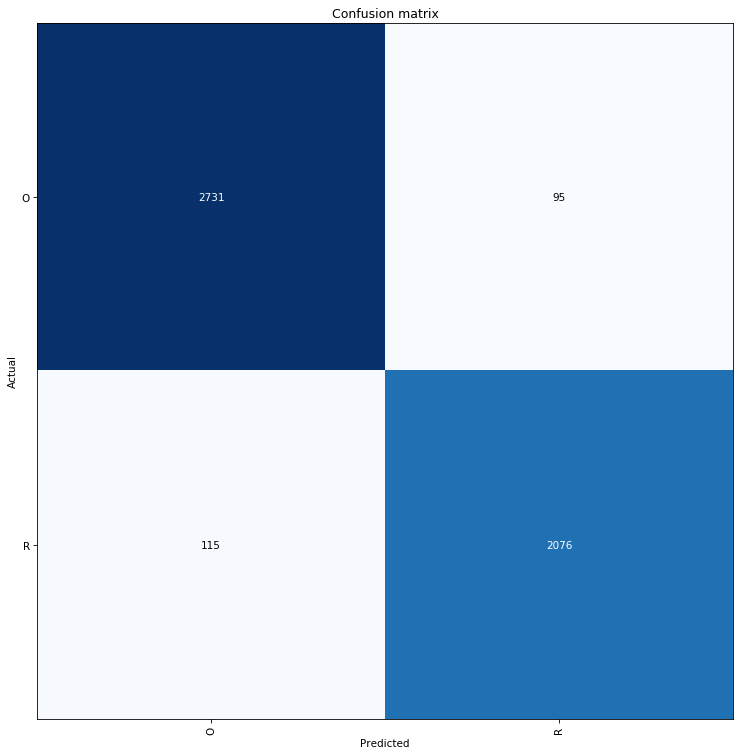

In [0]:
inter.plot_confusion_matrix(figsize=(10,10),dpi=75)
learn.save('waste-clf-fastai-V1')
learn.export('waste-clf-fastai-v1.pkl')